In [1]:
#import sys
#!{sys.executable} -m pip install findspark

In [2]:
import findspark
findspark.init()

In [3]:
import pyspark

In [5]:
import pandas as pd
import numpy as np

In [35]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [7]:
#from pyspark import SQLContext
#sqlContext=SQLContext(sc)

In [36]:
CV_data = spark.read.load('/Users/katie/Desktop/spark-lab/churn-bigml-80.csv',format='com.databricks.spark.csv',header='true',inferSchema='true')

In [41]:
final_test_data = spark.read.load('/Users/katie/Desktop/spark-lab/churn-bigml-20.csv',format='com.databricks.spark.csv', header='true',inferSchema='true')

In [42]:
CV_data.cache()

DataFrame[State: string, Account length: int, Area code: int, International plan: string, Voice mail plan: string, Number vmail messages: int, Total day minutes: double, Total day calls: int, Total day charge: double, Total eve minutes: double, Total eve calls: int, Total eve charge: double, Total night minutes: double, Total night calls: int, Total night charge: double, Total intl minutes: double, Total intl calls: int, Total intl charge: double, Customer service calls: int, Churn: boolean]

In [43]:
CV_data.printSchema()

root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: integer (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



In [44]:
pd.DataFrame(CV_data.take(5), columns=CV_data.columns).transpose()

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account length,128,107,137,84,75
Area code,415,415,415,408,415
International plan,No,No,No,Yes,Yes
Voice mail plan,Yes,Yes,No,No,No
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total day charge,45.07,27.47,41.38,50.9,28.34
Total eve minutes,197.4,195.5,121.2,61.9,148.3


In [45]:
CV_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
State,2666,None,None,AK,WY
Account length,2666,100.62040510127532,39.56397365334985,1,243
Area code,2666,437.43885971492875,42.521018019427174,408,510
International plan,2666,None,None,No,Yes
Voice mail plan,2666,None,None,No,Yes
Number vmail messages,2666,8.021755438859715,13.61227701829193,0,50
Total day minutes,2666,179.48162040510135,54.21035022086982,0.0,350.8
Total day calls,2666,100.31020255063765,19.988162186059512,0,160
Total day charge,2666,30.512404351087813,9.215732907163497,0.0,59.64


In [46]:
numeric_features = [t[0] for t in CV_data.dtypes if t[1] == 'int' or t[ 1] == 'double']

In [47]:
sampled_data = CV_data.select(numeric_features).sample(False, 0.10).toPandas()

/Users/katie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


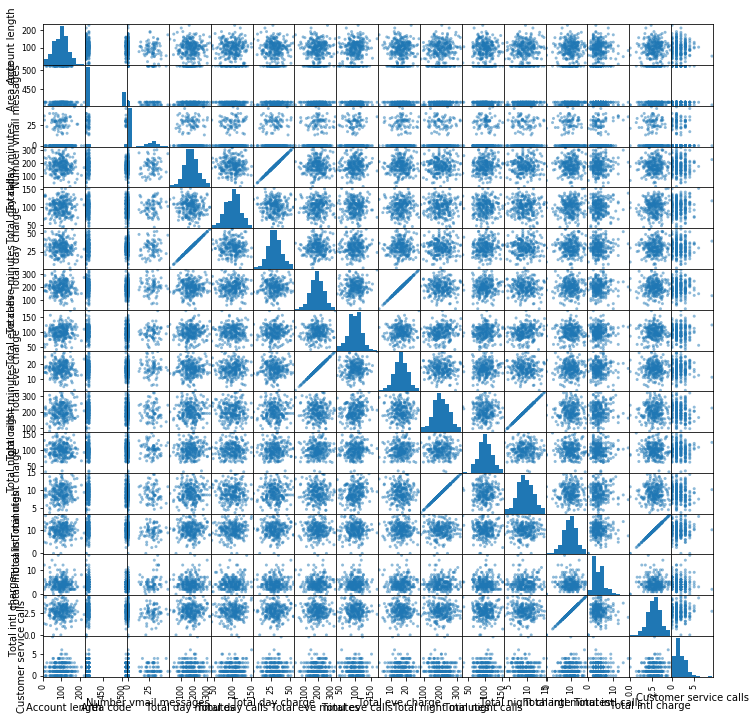

In [48]:
axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));

In [49]:
# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0] 
    v.yaxis.label.set_rotation(0) 
    v.yaxis.label.set_ha('right') 
    v.set_yticks(())
    h = axs[n-1, i] 
    h.xaxis.label.set_rotation(90) 
    h.set_xticks(())

In [50]:
import matplotlib.pyplot as plt
plt.show()

In [51]:
from pyspark.sql.types import DoubleType

In [52]:
from pyspark.sql.functions import UserDefinedFunction

In [53]:
binary_map = {'Yes':1.0, 'No':0.0, True:1.0, False:0.0}
toNum = UserDefinedFunction(lambda k: binary_map[k], DoubleType())

In [54]:
CV_data = CV_data.drop('State').drop('Area code')\
.drop('Total day charge').drop('Total eve charge')\
.drop('Total night charge').drop('Total intl charge')\
.withColumn('Churn', toNum(CV_data['Churn']))\
.withColumn('International plan', toNum(CV_data['International plan']))\
.withColumn('Voice mail plan', toNum(CV_data['Voice mail plan'])).cache()

In [55]:
final_test_data = final_test_data.drop('State').drop('Area code')\
.drop('Total day charge').drop('Total eve charge')\
.drop('Total night charge').drop('Total intl charge')\
.withColumn('Churn', toNum(final_test_data['Churn']))\
.withColumn('International plan', toNum(final_test_data['International plan']))\
.withColumn('Voice mail plan', toNum(final_test_data['Voice mail plan'])).cache()

In [56]:
pd.DataFrame(CV_data.take(5), columns=CV_data.columns).transpose()

,0,1,2,3,4
Account length,128.0,107.0,137.0,84.0,75.0
International plan,0.0,0.0,0.0,1.0,1.0
Voice mail plan,1.0,1.0,0.0,0.0,0.0
Number vmail messages,25.0,26.0,0.0,0.0,0.0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110.0,123.0,114.0,71.0,113.0
Total eve minutes,197.4,195.5,121.2,61.9,148.3
Total eve calls,99.0,103.0,110.0,88.0,122.0
Total night minutes,244.7,254.4,162.6,196.9,186.9
Total night calls,91.0,103.0,104.0,89.0,121.0


In [57]:
from pyspark.mllib.regression import LabeledPoint 
from pyspark.mllib.tree import DecisionTree

In [58]:
def labelData(data):
# label: row[end], features: row[0:end-1]
    return data.rdd.map(lambda row: LabeledPoint(row[-1], row[:-1]))

In [59]:
training_data,testing_data = labelData(CV_data).randomSplit([0.8,0.2])

In [62]:
model = DecisionTree.trainClassifier(training_data, numClasses=2, maxDepth=2,
                                     categoricalFeaturesInfo={1:2, 2:2},impurity='gini', maxBins=32)

In [64]:
print (model.toDebugString())

DecisionTreeModel classifier of depth 2 with 7 nodes
  If (feature 4 <= 264.75)
   If (feature 12 <= 3.5)
    Predict: 0.0
   Else (feature 12 > 3.5)
    Predict: 0.0
  Else (feature 4 > 264.75)
   If (feature 2 in {1.0})
    Predict: 0.0
   Else (feature 2 not in {1.0})
    Predict: 1.0



In [66]:
print ('Feature 12:', CV_data.columns[12])

Feature 12: Customer service calls


In [67]:
print ('Feature 4: ', CV_data.columns[4])

Feature 4:  Total day minutes


In [68]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [69]:
def getPredictionsLabels(model, test_data):
    predictions = model.predict(test_data.map(lambda r: r.features))
    return predictions.zip(test_data.map(lambda r: r.label))

In [73]:
def printMetrics(predictions_and_labels):
    metrics = MulticlassMetrics(predictions_and_labels)
    print ('Precision of True ', metrics.precision(1))
    print ('Precision of False', metrics.precision(0))
    print ('Recall of True    ', metrics.recall(1))
    print ('Recall of False   ', metrics.recall(0))
    print ('F-1 Score         ', metrics.fMeasure())
    print ('Confusion Matrix\n', metrics.confusionMatrix().toArray())

In [74]:
predictions_and_labels = getPredictionsLabels(model, testing_data)

In [75]:
printMetrics (predictions_and_labels)

Precision of True  0.8235294117647058
Precision of False 0.8684759916492694
Recall of True     0.18181818181818182
Recall of False    0.9928400954653938
F-1 Score          0.8669354838709677
Confusion Matrix
 [[416.   3.]
 [ 63.  14.]]
